# Project Name: Sales Prediction Using Python

# Problem Statement

This project aims to develop a machine learning model to predict product sales based on historical advertising expenditures across TV, Radio, and Newspaper. The objective is to assist businesses in understanding the impact of advertising strategies on sales performance and to support data-driven marketing decisions.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df=pd.read_csv("../Downloads/Advertising.csv")

In [68]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [70]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [71]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [72]:
df.size

1000

In [73]:
df.shape

(200, 5)

In [74]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [75]:
df.isnull().any()

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [76]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Visualization 

<Axes: ylabel='Sales'>

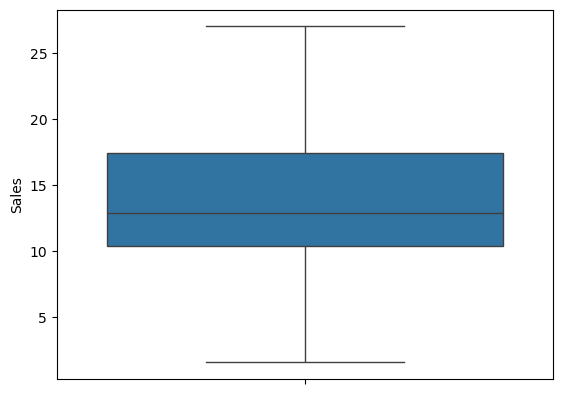

In [77]:
sns.boxplot(df["Sales"])

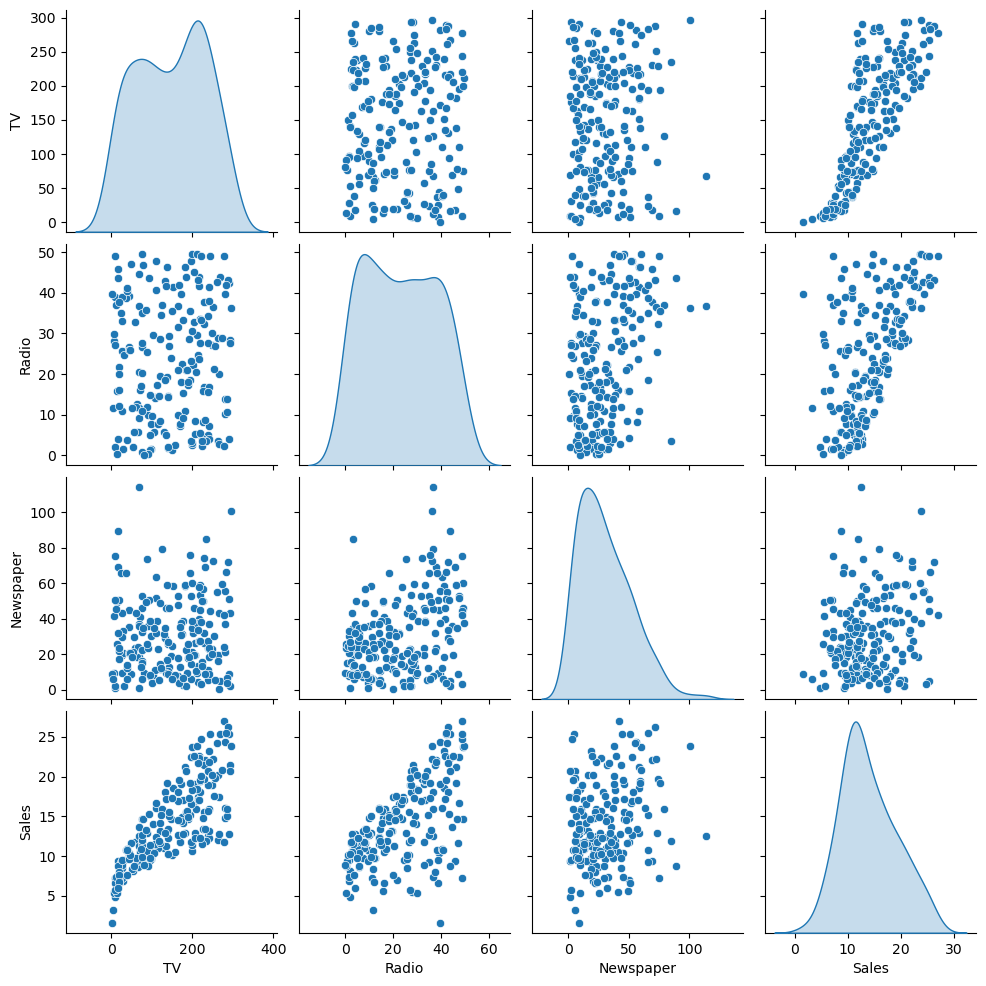

In [78]:
sns.pairplot(df.drop(columns=["Unnamed: 0"]),diag_kind="kde")

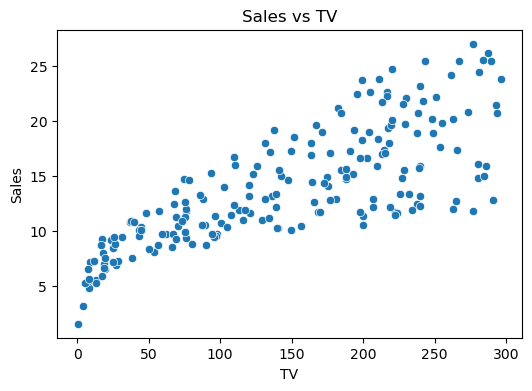

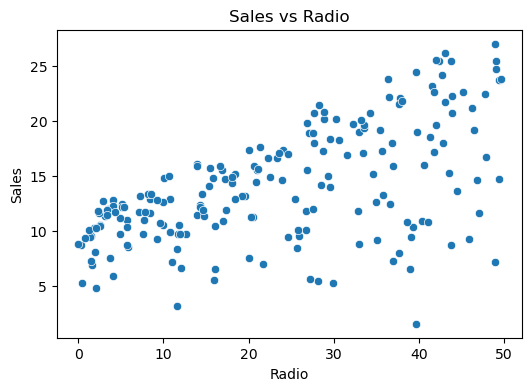

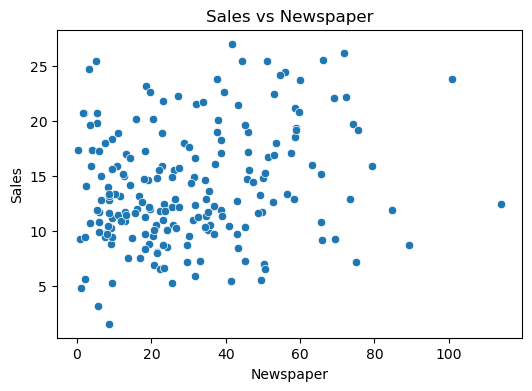

In [80]:
# TV vs Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x="TV", y="Sales", data=df)
plt.title("Sales vs TV")
plt.show()

# Radio vs Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Radio", y="Sales", data=df)
plt.title("Sales vs Radio")
plt.show()

# Newspaper vs Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Newspaper", y="Sales", data=df)
plt.title("Sales vs Newspaper")
plt.show()

# Correlation Heatmap

<Axes: >

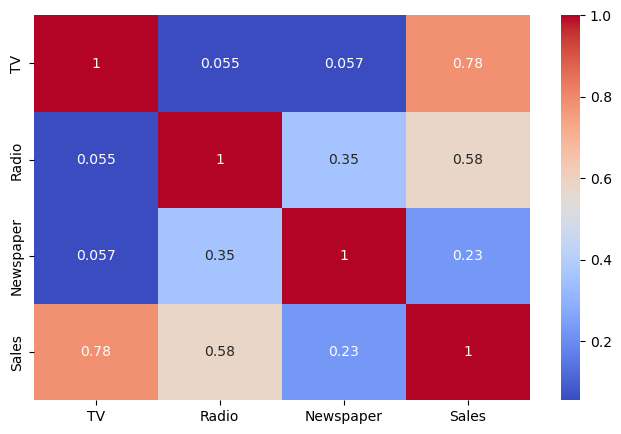

In [141]:
plt.figure(figsize=(8,5))
sns.heatmap(df.drop(columns=["Unnamed: 0"]).corr(),annot=True,cmap="coolwarm")

In [95]:
#defining the variables 
x=df.drop(columns=["Unnamed: 0","Sales"])
y=df["Sales"]

In [142]:
#split training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [97]:
x_train

,TV,Radio,Newspaper
86,76.3,27.5,16.0
182,56.2,5.7,29.7
69,216.8,43.9,27.2
125,87.2,11.8,25.9
42,293.6,27.7,1.8
...,...,...,...
50,199.8,3.1,34.6
184,253.8,21.3,30.0
165,234.5,3.4,84.8
7,120.2,19.6,11.6


In [98]:
x_test

,TV,Radio,Newspaper
96,197.6,3.5,5.9
5,8.7,48.9,75.0
116,139.2,14.3,25.6
35,290.7,4.1,8.5
183,287.6,43.0,71.8
160,172.5,18.1,30.7
54,262.7,28.8,15.9
134,36.9,38.6,65.6
90,134.3,4.9,9.3
191,75.5,10.8,6.0


In [99]:
y_train

86     12.0
182     8.7
69     22.3
125    10.6
42     20.7
       ... 
50     11.4
184    17.6
165    11.9
7      13.2
70     18.3
Name: Sales, Length: 160, dtype: float64

In [100]:
y_test

96     11.7
5       7.2
116    12.2
35     12.8
183    26.2
160    14.4
54     20.2
134    10.8
90     11.2
191     9.9
139    20.7
142    20.1
177    11.7
26     15.0
89     16.7
140    10.9
171    14.5
23     15.5
132     5.7
37     14.7
151    11.6
28     18.9
85     15.2
93     22.2
174    11.5
75      8.7
18     11.3
105    19.2
121     7.0
130     1.6
33     17.4
46     10.6
168    17.1
169    15.0
11     17.4
166     8.0
81     12.3
111    21.8
67     13.4
147    25.4
Name: Sales, dtype: float64

# Training ML models

# 1.Linear Regression Model

In [101]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()

In [102]:
lr.fit(x_train,y_train)

LinearRegression()

In [103]:
ypred_lr=lr.predict(x_test)
ypred_lr

array([12.61642732, 12.92004597, 12.08471384, 16.82199977, 24.05507461,
       14.27401262, 20.38340381, 12.18421129, 10.09174637,  8.66655408,
       19.95514125, 19.30787454, 12.14730531, 15.21977508, 17.23740592,
        9.7598278 , 14.41000251, 16.51146169,  8.92695588, 16.02464885,
       10.05186805, 19.4154987 , 15.12151244, 21.16976203, 13.66330888,
       12.21606824, 10.2390723 , 18.17447189,  8.14300866, 10.98457653,
       18.84836683,  9.0123122 , 17.14149406, 17.81595324, 17.37571806,
       11.30634219, 14.48268811, 21.22881792, 12.1818627 , 23.36759687])

In [104]:
lr.score(x_test,ypred_lr)

1.0

In [105]:
lr.score(x_test,y_test)

0.7982652261831077

In [106]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_lr=mean_absolute_error(y_test,ypred_lr)
print("Mean Absolute error is:",mae_lr)


mse_lr=mean_squared_error(y_test,ypred_lr)
print("Mean Squared error is:",mse_lr)

rmse_lr=np.sqrt(mse_lr)
print("Root Mean Squared error is:",rmse_lr)

r2_lr=r2_score(y_test,ypred_lr)
print("r2 score is:",r2_lr)

Mean Absolute error is: 1.5795751064324317
Mean Squared error is: 5.544921079243528
Root Mean Squared error is: 2.3547656102558334
r2 score is: 0.7982652261831077


# 2.Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [109]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [111]:
ypred_rf=rf.predict(x_test)
ypred_rf

array([11.668,  7.397, 13.606, 12.277, 25.059, 14.566, 20.179, 10.531,
       11.143,  9.817, 20.815, 19.473, 12.691, 16.52 , 15.102, 11.174,
       14.759, 15.401,  5.128, 13.685, 11.492, 19.362, 14.868, 22.438,
       11.921,  8.607, 11.007, 18.403,  7.181,  5.668, 16.151,  9.915,
       16.283, 14.474, 16.764,  7.881, 12.112, 22.138, 13.557, 24.083])

In [112]:
rf.score(x_test,ypred_rf)

1.0

In [113]:
rf.score(x_test,y_test)

0.9684883033322865

In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_rf=mean_absolute_error(y_test,ypred_rf)
print("Mean Absolute error is:",mae_rf)


mse_rf=mean_squared_error(y_test,ypred_rf)
print("Mean Squared error is:",mse_rf)

rmse_rf=np.sqrt(mse_rf)
print("Root Mean Squared error is:",rmse_rf)

r2_rf=r2_score(y_test,ypred_rf)
print("r2 score is:",r2_rf)

Mean Absolute error is: 0.5997500000000009
Mean Squared error is: 0.8661366000000011
Root Mean Squared error is: 0.9306646012393515
r2 score is: 0.9684883033322865


# 3.XG Boost Regressor

In [118]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(objective='reg:squarederror', 
                        n_estimators=100, 
                        learning_rate=0.1, 
                        max_depth=3, 
                        random_state=40)

In [120]:
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=40, ...)

In [122]:
ypred_xg=xgbr.predict(x_test)
ypred_xg

array([11.531599 , 10.10813  , 12.709516 , 12.339333 , 25.365618 ,
       14.082617 , 20.395193 ,  9.884585 , 10.955135 ,  9.57528  ,
       20.90051  , 19.304369 , 12.089293 , 16.051006 , 16.560844 ,
       10.589295 , 15.066282 , 15.325892 ,  5.836404 , 15.209241 ,
       11.606653 , 19.776709 , 15.267835 , 22.662474 , 11.680472 ,
        8.902692 , 11.250461 , 17.6234   ,  7.3647227,  6.8558717,
       16.476961 ,  9.9266615, 16.637754 , 14.871954 , 16.576216 ,
        7.6183515, 12.298822 , 23.146389 , 12.701619 , 25.446615 ],
      dtype=float32)

In [123]:
xgbr.score(x_test,ypred_xg)

1.0

In [124]:
xgbr.score(x_test,y_test)

0.9550332725137242

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_xg=mean_absolute_error(y_test,ypred_xg)
print("Mean Absolute error is:",mae_xg)


mse_xg=mean_squared_error(y_test,ypred_xg)
print("Mean Squared error is:",mse_xg)

rmse_xg=np.sqrt(mse_xg)
print("Root Mean Squared error is:",rmse_xg)

r2_xg=r2_score(y_test,ypred_xg)
print("r2 score is:",r2_xg)

Mean Absolute error is: 0.6419810080528261
Mean Squared error is: 1.235964183991228
Root Mean Squared error is: 1.1117392607941972
r2 score is: 0.9550332725137242


# 4.LightGBM Regressor

In [126]:
import lightgbm as lgb

In [127]:
lgbm=lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=40)

In [128]:
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] Start training from score 13.980000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(max_depth=3, random_state=40)

In [130]:
ypred_lgb=lgbm.predict(x_test)
ypred_lgb

array([11.38807839,  9.74719769, 12.56699435, 13.03126721, 24.85623649,
       13.60289359, 20.30412544,  7.83739543, 10.31482805,  9.4262937 ,
       21.84404227, 19.74669253, 12.00293516, 15.29793158, 16.10894528,
       10.64026838, 14.36981989, 14.90877174,  7.31892922, 14.11371235,
       11.65228433, 20.11958144, 14.82708417, 23.26918073, 11.20304182,
        9.74719769, 11.91632349, 17.6304724 ,  7.34033226,  7.95241544,
       16.40745342, 10.09309438, 16.84316859, 14.79402853, 16.80241692,
        8.0010487 , 12.55098245, 23.75779197, 12.69074754, 24.85169249])

In [131]:
lgbm.score(x_test,ypred_lgb)

1.0

In [132]:
lgbm.score(x_test,y_test)

0.9290104098162099

In [133]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_lgb=mean_absolute_error(y_test,ypred_lgb)
print("Mean Absolute error is:",mae_lgb)


mse_lgb=mean_squared_error(y_test,ypred_lgb)
print("Mean Squared error is:",mse_xg)

rmse_lgb=np.sqrt(mse_lgb)
print("Root Mean Squared error is:",rmse_lgb)

r2_lgb=r2_score(y_test,ypred_lgb)
print("r2 score is:",r2_lgb)

Mean Absolute error is: 0.8715856332373221
Mean Squared error is: 1.235964183991228
Root Mean Squared error is: 1.3968656449439778
r2 score is: 0.9290104098162099


# Final Model performance comparison

In [136]:
final_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor","XGBoost Regressor","LightGBM Regressor"],
    "R² Score": [r2_lr, r2_rf,r2_xg,r2_lgb],
    "MAE": [mae_lr, mae_rf,mae_xg,mae_lgb],
    "MSE": [mse_lr, mse_rf,mse_xg,mse_lgb],
    "RMSE": [rmse_lr, rmse_rf,rmse_xg,rmse_lgb]
})

In [137]:
final_results

,Model,R² Score,MAE,MSE,RMSE
0,Linear Regression,0.798265,1.579575,5.544921,2.354766
1,Random Forest Regressor,0.968488,0.599750,0.866137,0.930665
2,XGBoost Regressor,0.955033,0.641981,1.235964,1.111739
3,LightGBM Regressor,0.929010,0.871586,1.951234,1.396866


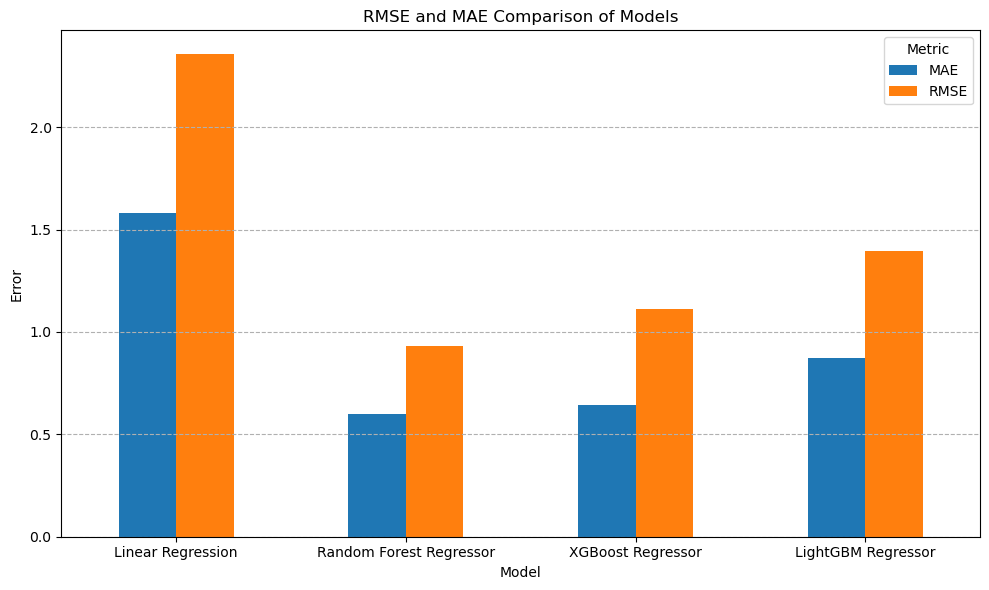

In [146]:
import matplotlib.pyplot as plt

metrics_df = final_results.set_index("Model")[["MAE", "RMSE"]]

# Plot
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("RMSE and MAE Comparison of Models")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Comparison of R² Scores of Models')

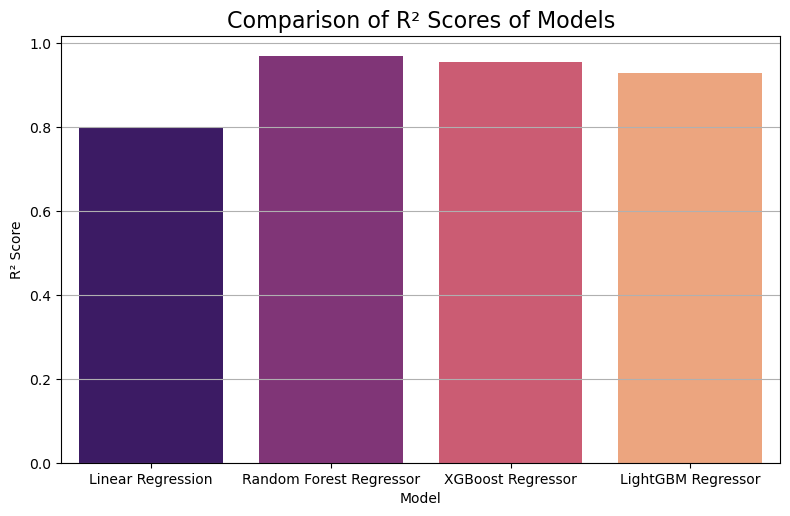

In [144]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model",y="R² Score",hue="Model",data=final_results,palette="magma")
plt.tight_layout()
plt.grid(True,axis="y")
plt.title("Comparison of R² Scores of Models",fontsize=16)

# Checking for Underfitting or Overfitting of Data

In [140]:
from sklearn.metrics import r2_score

# On training data
y_train_pred_lr = lr.predict(x_train)
r2_train = r2_score(y_train, y_train_pred_lr)

# On testing data
r2_test = r2_score(y_test, ypred_lr)

print("R² on Train:", r2_train)
print("R² on Test :", r2_test)


R² on Train: 0.920068668721091
R² on Test : 0.9684883033322865


# Conclusion

The sales prediction task successfully demonstrated the application of multiple regression models to estimate product sales based on advertising expenditures. After thorough model evaluation, the Random Forest Regressor emerged as the most effective model, achieving high accuracy and low prediction error. Its ability to capture complex, non-linear relationships between variables made it particularly well-suited for this dataset.

The results validate the importance of using ensemble methods like Random Forest and XGBoost in real-world regression problems where accuracy and generalization are critical. This project not only enhanced understanding of regression modeling and performance evaluation but also